## Importing the required libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

## Reading and Extracting data from .csv files

In [69]:
train_tweets = pd.read_csv('train_tweets.csv')
test_tweets = pd.read_csv('test_tweets.csv')

In [70]:
train_tweets = train_tweets[['label','tweet']]
test = test_tweets['tweet']

## Exploratory Data Analysis

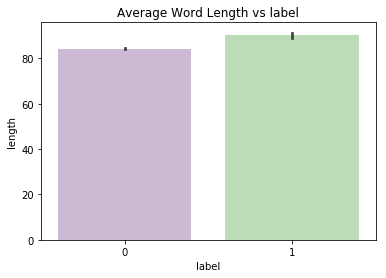

In [91]:
train_tweets['length'] = train_tweets['tweet'].apply(len)
fig1 = sns.barplot('label','length',data = train_tweets,palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

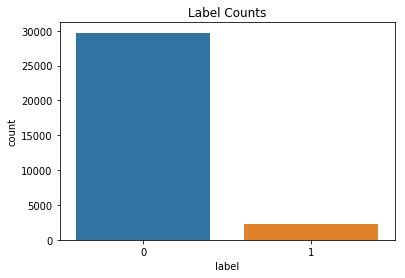

In [92]:
fig2 = sns.countplot(x= 'label',data = train_tweets)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')

## Feature Engineering

In [77]:
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [79]:
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_processing)
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_processing)

In [81]:
train_tweets[train_tweets['label']==1].drop('tweet',axis=1).head()

,label,length,tweet_sentence,tweet_list
13,1,74,"[cnn, call, michigan, middle, school, wall, ch...","[cnn, call, michigan, middle, school, wall, ch..."
14,1,101,"[comment, australia, opkillingbay, seashepherd...","[comment, australia, opkillingbay, seashepherd..."
17,1,22,"[retweet, agree]","[retweet, agree]"
23,1,47,"[lumpy, say, prove, lumpy]","[lumpy, say, prove, lumpy]"
34,1,104,"[unbelievable, century, need, something, like,...","[unbelievable, century, need, something, like,..."


## Model Selection and Machine Learning

In [83]:
X = train_tweets['tweet']
y = train_tweets['label']
test = test_tweets['tweet']

In [84]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)

In [85]:
#Machine Learning Pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_processing at 0x12C7EC00>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=Non...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [86]:
predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6321
           1       0.15      1.00      0.27        72

   micro avg       0.94      0.94      0.94      6393
   macro avg       0.58      0.97      0.62      6393
weighted avg       0.99      0.94      0.96      6393



[[5927  394]
 [   0   72]]
0.9383700922884405


In [98]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)
print(form_sentence(train_tweets['tweet'].iloc[10]))
print(train_tweets['tweet'].iloc[10])

â ireland consumer price index mom climbed from previous 0.2 to 0.5 in may blog silver gold forex
 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex


In [99]:
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

print(no_user_alpha(form_sentence(train_tweets['tweet'].iloc[10])))
print(train_tweets['tweet'].iloc[10])

['ireland', 'consumer', 'price', 'index', 'mom', 'climbed', 'previous', 'may', 'blog', 'silver', 'gold', 'forex']
 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex


In [101]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(normalization(tweet_list))

['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']
